# Daily Music Analysis
##### Daniel Hoberman
##### CPSC 222, Fall 2020

## Introduction

### Domain Introduction
* I will be analyzing the headphone music volume domain
* I love listening to music and I listen to many hours of music a week. I wanted to discover what factors lead to listening to my music louder.
* I will be researching the average volume of my music per day, and the effects of school, stress, and music categories.
### Dataset Description
* The tables I am testing are average music volume (from Apple health), my stress level (personal recording), day of the week (from Apple health), average music category (from Spotify), and music device (personal recording).
* The format I will use is csv.
* Music volume will be recorded in decibels and is the average volume for the day. Stress level will be on a scale of 1-9. Day of week is fairly self explanatory. Average music category will be the category that I listened to most that day. Lastly, music device could be my airpods or a speaker.
#### Hypothesis
1. I listen to louder music on Saturday then on Sunday
    1. Saturday is the one day I feel free from school. Sunday is when I start doing homework and studying.
2. I listen to louder music when my stress level is high
    1. When I am very stressed with school I listen to louder music.
3. I Listen to rap and randb at similar levels
    1. Rap and randb are my two favorite genres. I want to see if I listen to them using the same volume.
4. Weekdays louder than weekends
    1. Do I listen to louder music while school is in session or on weekends?
5. Does music choice affect my stress level?
### Classification
* I attempted to classify the average music volume per day. I struggled to get the kNN classifier to have high accuracy. The best I was able to achieve was 0.0625 at an n_neighbors value of 1. I dropped columns and tested many n_neighbor values and I couldn't improve the kNN classifier accuracy.
#### Before Cleaning

In [1]:
import utils as util
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

# loading csv file
df = pd.read_csv("music_data.csv")

# using dropna() to clear out empty data, but since data was collected manually dataset is already clean
df.dropna()

util.output(df)
util.clean_class(df)
print(df)

# setting up kNN and decision tree, dropping mDevice and testing set: DB
X_train = df.drop(["DB","mDevice"], axis=1)
# Y train should only include testing set
Y_train = df['DB']

## Problem 1
1. For this problem, I will test if I listen to louder music on Saturday then Sunday
    1. This data consists of information collected from myself
    2. Because I am comparing two different samples to eachother, from within a population I will use a two-sample t test
        1. The data has two samples, we don't know the population stdv
        2. Because of this we will use the t test
        3. This will be a one tailed test
        4. The data is independent because the samples don't affect eachother
        5. Sig = 0.01
2. Hypothesis test
    1. Step 1
        * $H_{0}: u_{1} \leq u_{2}$
        * $H_{1}: u_{1} > u_{2}$
    2. Step 2
        * $\alpha = 0.01$
    3. Step 3
        * $t =\frac{\overline{x_1}-\overline{x_2}}{\sqrt{s_{p}^{2}(\frac{1}{n_{1}}+\frac{1}{n_2})}}$
    4. Step 4
        * $(n_{1}-1)+(n_{2}-1)-2$
        * t =2.583 based of df= 16 sig = 0.01
        * if t-computed > 2.639 reject $H_{0}$
        * if t-computed <= 2.639 don't reject $H_{0}$

In [3]:
# Calculates T value
weekendValues = util.weekendGroups(df)
print("Computed T Value:", weekendValues[0])

Computed T Value: 0.055933267915616036


1. step 5
    1. t-calculated = 0.056
        * Don't reject $H_{0}$
        * Reject $H_{1}$
        * $u_{1} > u_{2}$
        
##### Results determine that louder music is listened to on Saturday
    

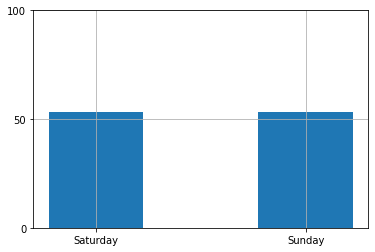

In [4]:
# plotting Saturday vs Sunday mean music volume
util.sunSat_plot(weekendValues[1], weekendValues[2], df)

## Problem 2
1. For this problem, I will test if I listen to louder music at stress 9 vs stress 1
    1. This data consists of information collected from myself
    2. Because I am comparing two different samples to eachother, from within a population I will use a two-sample t test
        1. The data has two samples, we don't know the population stdv
        2. Because of this we will use the t test
        3. This will be a one tailed test
        4. The data is independent because the samples don't affect eachother
        5. Sig = 0.01
2. Hypothesis test
    1. Step 1
        * $H_{0}: u_{1} \leq u_{2}$
        * $H_{1}: u_{1} > u_{2}$
    2. Step 2
        * $\alpha = 0.01$
    3. Step 3
        * $t =\frac{\overline{x_1}-\overline{x_2}}{\sqrt{s_{p}^{2}(\frac{1}{n_{1}}+\frac{1}{n_2})}}$
    4. Step 4
        * $(n_{1}-1)+(n_{2}-1)-2$
        * t =2.821 based of df= 9 sig = 0.01
        * if t-computed > 2.639 reject $H_{0}$
        * if t-computed <= 2.639 don't reject $H_{0}$

In [5]:
# Calculates t value for stress group comparison
stressValues = util.stressGroups(df)
print("Computed T Value:", stressValues[0])

Computed T Value: 0.5636925245587734


1. step 5
    1. t-calculated = 0.56
        * Don't reject $H_{0}$
        * Reject $H_{1}$
        * $u_{1} > u_{2}$
        
##### Results determine that I listen to louder music when stressed

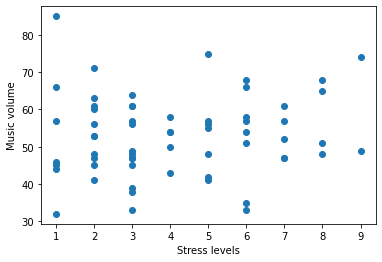

In [6]:
# scatter plot shows ranges of music volumes at different stress levels
util.volumeScatter(df)

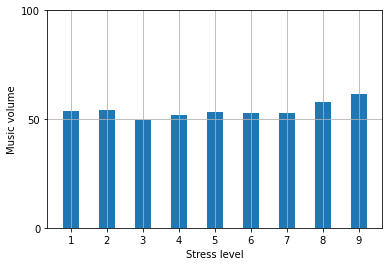

In [7]:
# plots music volume vs stress level
util.stressBar(stressValues[9], stressValues[8],stressValues[7],stressValues[6],stressValues[5],stressValues[4],stressValues[3],stressValues[2],stressValues[1],df)

## Problem 3
1. For this problem, I must compare the mean volume of randb to mean volume of rap
    1. This data consists of information collected from myself
    2. Because I am comparing two different samples to eachother, from within a population I will use a two-sample t test
        1. The data has two samples, we don't know the population stdv
        2. Because of this we will use the t test
        3. The data is independent because the samples don't affect eachother
        4. Sig = 0.01
        5. Comparing data if equal or not so used two tails
2. Hypothesis test
    1. Step 1
        * $H_{0}: u_{1} = u_{2}$
        * $H_{1}: u_{1} \neq u_{2}$
    2. Step 2
        * $\alpha = 0.01$
    3. Step 3
        * $t =\frac{\overline{x_1}-\overline{x_2}}{\sqrt{s_{p}^{2}(\frac{1}{n_{1}}+\frac{1}{n_2})}}$
    4. Step 4
        * $(n_{1}-1)+(n_{2}-1)-2$
        * = 16+9
        * t =2.485 based of df= +25 sig = 0.01
        * if t-computed < -2.485 or > 2.485 reject $H_{0}$
        * if t-computed >= -2.485 and <= 2.485, don't reject $H_{0}$

In [8]:
#organizing data by music type
groupValues = util.musicGroups(df)
print("Computed T Value:", groupValues[0])

17
10
Computed T Value: 0.6314266057919008


1. step 5
    1. t-calculated = 0.63
        * Don't reject $H_{0}$
        * reject $H_{1}$
        * $u_{1} = u_{2}$

#### Comparing results
1. Based off the t-test both results have an equal mean.
2. In 2 months I listened to randb a majority of the time 17 times vs. 10 for rap. This shows that even though the music volume is similar, I listen to randb more.

##### graph of music type vs music volume

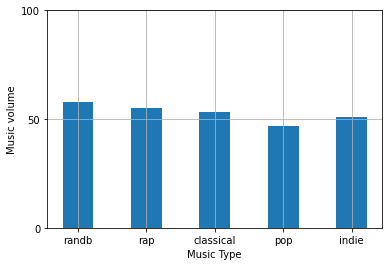

In [9]:
# plots average music volume for each music type
util.musicType_plot(groupValues[2],groupValues[1],groupValues[4],groupValues[5],groupValues[3],df)

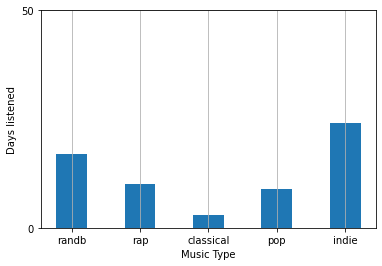

In [13]:
# plots how many days I listened to each music category
util.musicCategory_plt(groupValues[6],groupValues[7],groupValues[8],groupValues[9],groupValues[10], df)

## Problem 4
1. For this problem, I will test if I listen to louder music on weekends vs weekdays
    1. This data consists of information collected from myself
    2. Because I am comparing two different samples to eachother, from within a population I will use a two-sample t test
        1. The data has two samples, we don't know the population stdv
        2. Because of this we will use the t test
        3. This will be a one tailed test
        4. The data is independent because the samples don't affect eachother
        5. Sig = 0.01
2. Hypothesis test
    1. Step 1
        * $H_{0}: u_{1} \leq u_{2}$
        * $H_{1}: u_{1} > u_{2}$
    2. Step 2
        * $\alpha = 0.01$
    3. Step 3
        * $t =\frac{\overline{x_1}-\overline{x_2}}{\sqrt{s_{p}^{2}(\frac{1}{n_{1}}+\frac{1}{n_2})}}$
    4. Step 4
        * $(n_{1}-1)+(n_{2}-1)-2$
        * t =2.390 based of df= 61 sig = 0.01
        * if t-computed > 2.390 reject $H_{0}$
        * if t-computed <= 2.390 don't reject $H_{0}$

In [23]:
# getting each individual day of the week
weekdayWeekendValues = util.weekdayWeekend(df)
print("Computed T Value:", weekdayWeekendValues)

Computed T Value: 0.25958706582558055


1. step 5
    1. t-calculated = 0.26
        * Don't reject $H_{0}$
        * reject $H_{1}$
        * $u_{1} > u_{2}$
        
2. Weekend values are greater then weekday values.
    1. This should make sense because we listen to loud music on the weekends

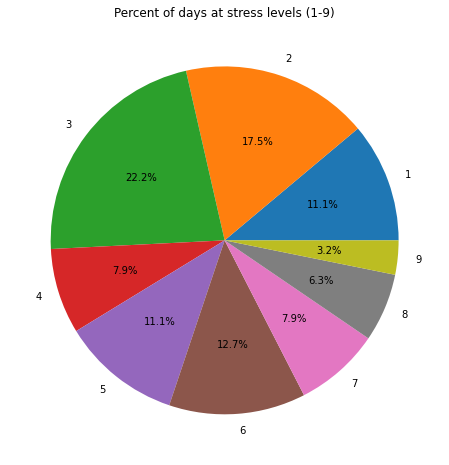

In [24]:
# Groups stress values then creates pie plot based on percent of days at stress levels
util.pieChart(df)

## Data Analysis
### Data Preparation
* There will not be any missing data values because I have hand-collected this data, and I haven't missed any values. The data that I didn't collect by hand comes from Apple, so it is complete.
* I checked for missing or mismarked data, but because most data was self collected there was no error.
### Exploratory Data Analysis
1. The graphs show that my mean music volume is very similar on Saturday and Sunday.
2. At low stress levels music volume varies the most (ranges from low volume to high volume), at middle stress levels music volume has low variance and volume is at mid-range, and at high stress levels average music volume increases with low variance.
3. I listen to randb loudest; then rap; then classical; then indie; and then pop.
4. Suprisingly I listen to indie more then randb and rap. It is likely that, during the gathering phase, I was into some indie songs.
5. Roughly 50% of the time my stress level is between 1 and 3. I experience high stress levels (7-9) only about 18% of the time.
### Statistical Analysis
1. Even though the graphs looked like the music volume on Sunday was the same as on Saturday, the statistical analysis showed that I listen to louder music on Saturday.
2. The statistical analysis showed that I listen to louder music when I am very stressed (level 9) vs not stressed at all (level 1).
3. Statistical analysis shows that the mean volume of rap is equivalent to the mean volume of randb.
4. Lastly, I tested whether I listen to louder music on weekends vs weekdays. The results showed that I listen to louder music on the weekends.

#### Beginning Machine Learning Analysis

In [14]:
# transforming DofW and mType to numeric
le = LabelEncoder()

X_train["DofW"] = le.fit_transform(X_train['DofW'])
X_train["mType"] = le.fit_transform(X_train['mType'])

print(X_train)

    DofW  Stress  mType
0      1       3      4
1      4       6      1
2      6       3      1
3      5       7      1
4      0       5      3
..   ...     ...    ...
58     6       2      1
59     5       8      1
60     0       8      3
61     2       2      1
62     3       1      3

[63 rows x 3 columns]


In [15]:
#Scaling data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

#splitting up data for test groups
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, random_state=0)
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

[[0.16666667 0.75       0.        ]
 [0.83333333 1.         0.75      ]
 [0.16666667 0.625      1.        ]
 [0.16666667 0.625      0.75      ]
 [0.16666667 0.625      0.5       ]
 [0.66666667 0.         0.25      ]
 [0.16666667 0.5        1.        ]
 [0.33333333 0.5        0.25      ]
 [0.33333333 0.125      0.5       ]
 [0.5        0.625      0.5       ]
 [0.66666667 0.875      0.25      ]
 [0.         0.5        0.25      ]
 [0.83333333 0.875      0.25      ]
 [0.83333333 1.         0.        ]
 [0.66666667 0.25       0.5       ]
 [1.         0.375      1.        ]
 [0.33333333 0.125      0.75      ]
 [1.         0.25       0.5       ]
 [0.5        0.375      0.75      ]
 [0.5        0.25       0.25      ]
 [0.66666667 0.625      1.        ]
 [0.5        0.125      0.5       ]
 [0.         0.875      0.75      ]
 [1.         0.25       0.75      ]
 [0.83333333 0.75       0.25      ]
 [0.33333333 0.125      0.25      ]
 [0.83333333 0.75       0.5       ]
 [0.16666667 0.         0.25

In [16]:
# setting up clf
clf = KNeighborsClassifier(n_neighbors=1, metric="euclidean")
clf.fit(X_train, Y_train)

#  predicted y values
Y_predicted = clf.predict(X_test)
print(Y_predicted)

# accuracy of predictions
accuracy = clf.score(X_test, Y_test)
print(accuracy)

[54 47 85 50 47 45 54 35 42 49 63 48 35 49 46 63]
0.0625


#### Highest accuracy

1. n_neighbors level
    1. neighbors 1 = 0.0625
2. relatively low accuracy for prediction. Likely because sample size isn't that large

In [17]:
# setting up decisionTree using random_state
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, Y_train)

#predicted values of the tree
y_predicted_tree = tree_clf.predict(X_test)
print(y_predicted_tree)

#accuracy of the tree
accuracy_tree = tree_clf.score(X_test, Y_test)
print(accuracy_tree)

[54 47 85 61 48 45 54 48 42 49 47 48 48 47 45 47]
0.125


#### Decision tree accuracy and kNN accuracy

1. Using a max depth of 25 gives me an accuracy of 0.125 if I drop mDevice
2. Using a max depth of 26 gives me an accuracy of 0.0625 if I drop mDevice and mType
3. Using a max depth of 25 gives me an accuracy of 0.0625 if I drop Stress
4. Using a max depth of 15 gives me an accuracy of 0.125 if I drop mDevice
5. Dropping everything but stress gives me 0 on accuracy for every depth or n_neighbors
6. Dropping mDevice and n_neighbors 1 gives me accuracy of 0.0625
7. Dropping everything but day of the week also gives me 0 accuracy
8. Using random state for decision tree also gives me accuracy of 0.125

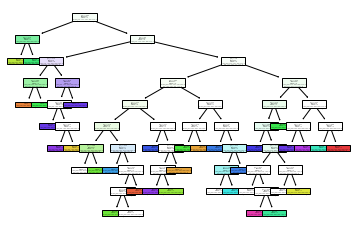

In [18]:
# code used to plot the tree
fig = plt.figure()
tree.plot_tree(tree_clf, filled=True)
fig.savefig("music_data_tree.pdf")

In [19]:
# finding the lin regression score of X-test, Y_test
reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_predicted = reg.predict(X_test)
print("Lin Reg Score:", reg.score(X_test,Y_test))

Lin Reg Score: -0.17464205777191766


In [20]:
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, Y_train)
Y_predicted_tree = tree_reg.predict(X_test)
print("Tree Score:", tree_reg.score(X_test, Y_test))

Tree Score: -1.269130375051518


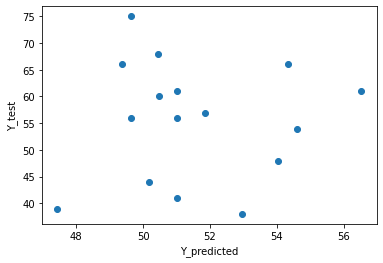

In [21]:
import matplotlib.pyplot as plt
plt.figure()
# plotting Y_predicted compared to Y_test
plt.scatter(Y_predicted, Y_test)
plt.xlabel("Y_predicted")
plt.ylabel("Y_test")
plt.show()

## Classification Results

### Result discussion
Overall, the results of my classification were disappointing. I tested accuracy after dropping each individual column. The only column that boosted accuracy by dropping it was the music device. I tested changing the n_neighbors 1-60 and I got a result of 0 if I went over the value of 2. Final results were kNN accuracy of 0.0625 and decision tree accuracy of 0.125

### Comparing kNN to decision tree
My decision tree ended up being more accurate at predictions then my kNN. My theory for this is that the decision tree is supervised and, therefore, allowed for more tweaking.

### Analyzing decision tree regressor/ linear regression
My linear regression score was -0.17 and my tree regression score was -1.26. This shows that these tests weren't accurate prediction methods. I didn't get interesting results from this, but the graph does show that some predictions were close, but huge outliers exist.


# Conclusion

### Classification Conclusion
I believe the lack of accuracy in kNN classifier and the decision tree has to do with two factors. The first is that the dataset was collected through-out the semester and I only had 63 data entrees. A small sample size leads to much lower accuracy in classification. I listen to my music at somewhat random and unpredictable volumes. After analyzing the factors I tested -- stress, day of the week, music type, and music device -- I found that there were some correlations but the factors weren't able to fully predict my data.

### Improvements
First, I would improve the accuracy by continuing to collect data for a much longer period of time so that I had at least a few hundred data entrees. Second, I would try to find different things to test that are more correlated to music volume. Examples of this would be what I am doing while listening to my music (activity), how much I am enjoying my music (enjoyment), and whether I am feeling happy/sick etc. (health). I think with those changes my testing would be more accurate and detailed.

### Summary
This data analysis gave me some insights into what affects my music volume. However, I felt that the factors I used for testing were likely not the biggest factors on my music volume. In the future, I will analyze different factors to get better results. My hypothesis testing predictions mostly came true, but they didn't show big differences between the rejected and not rejected data. My machine learning results gave me little insight into my music volume prediction.

### Ethical Impacts
I don't think there are ethical impacts from my data. It mostly involves data from myself and it didn't have any conclusive results. I do think it is important for people listening to music to pay attention to their music volume and to factors that lead to hearing damage.